<a href="https://colab.research.google.com/github/T-Sawao/diveintocode-ml3/blob/main/term2_sprint14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kerasでディープラーニングの流れ / 定石
ディープラーニングの流れとして、以下の1〜4の手順を行っていきます。
- 1) データを学習用とテスト用に分ける。
- 2) モデルの定義
- 3) モデルの学習
- 4) 結果を評価する  

基本的に、Kerasに限らず、ディープラーニングを作る際には上記の流れになります。
Kerasでネットワークのアーキテクチャを作る手順はある程度次のようになります。
 
- 1.データセットの読み込み
- 2.モデルを作る model = Sequential()
- 3.add()を使ってモデルの層を作る
- 例) model.add(Dense())
- 4.モデルを初期化する model.compile()
- 5.モデルを学習する model.fit()
- 6.モデルの重みを保存する model.save_weights()
- 7.モデルを評価する model.evaluate()
- 8.モデルを利用する model.predict()

### モデル
Kerasでは、ディープラーニングのアーキテクチャを表現するモデルの書き方として、
Sequentialモデルと、functional APIを利用したモデルの2種類があります。

### Sequentialモデル
Sequentialモデルは、構成できるネットワークアーキテクチャが線形スタックに限定されます。
線形スタックとは、入力と出力が必ず一つずつのアーキテクチャで、複数の入力を受け取ったり、中間層を分岐させることはできません。
とはいえ、多くの場合、線形スタックアーキテクチャを使うのでこのSequentialモデルを使用する機会が多いです。
KerasではSequentialモデルを利用することで、ネットワークを構築することが出来るようになります。
以下のプログラムでは、Sequentialモデルを利用した方法になります。
1


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

epochs = 50

data = np.random.random((1000, 784))
labels = np.random.randint(10, size=(1000, 1))

#ラベルの変換
labels = keras.utils.to_categorical(labels, 10)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

#モデルのコンパイル
model.compile(optimizer='rmsprop',
      loss='categorical_crossentropy',
      metrics=['accuracy'])
#学習を行う
model.fit(data, labels, epochs=epochs)

### functional API
SequentialモデルとfunctionalAPIの違う部分としては、
Sequentialモデルは層を積み上げていくイメージなのに対し、functional APIは層の出力をロープのようにつなげていくイメージです。functional APIでは有向非巡回グラフが対象のためより線形スタック以外の任意のアーキテクチャも扱うことが可能です。

In [ ]:
import keras
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

epochs = 50

data = np.random.random((1000, 784))
labels = np.random.randint(10, size=(1000, 1))
labels = keras.utils.to_categorical(labels, 10)#ラベルの変換

inputs = Input(shape=(784,))
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data, labels, epochs=epochs)

## レイヤー(Coreレイヤー)
『3.add()を使ってモデルの層を作る』の部分のadd()の引数にはレイヤーを渡します。
主要なレイヤーには次のようなものがあります。
より詳細なレイヤーは公式リファレンスをご確認ください。
 
- Denseレイヤー(全結合ニューラルネットワークレイヤー)
model.add(Dense(3))
- Activation
出力に活性化関数を適用します。
- Dropout
入力にドロップアウトを適用し、過学習を防ぐのを助けてくれる役割をします。
- Flatten
入力を平滑化する役割をします。
model.add(Flatten())

## Convolutionレイヤー
- Conv2D
2次元入力をフィルターする畳み込み層です。
このレイヤーをモデルの第1層に使う場合はキーワード引数input_shape
（整数のタプル，サンプル軸を含まない）を指定する必要があります。
https://keras.io/ja/layers/convolutional/
 
Poolingレイヤー
-  MaxPooling2D
空間データのマックスプーリング演算を行います。
https://keras.io/ja/layers/pooling/
 
Normalizationレイヤー(BatchNormalization)
- Batch Normalizationとは
勾配消失・爆発を防ぐための手法です。
学習プロセスを全体的に安定させ学習速度をあげることが出来ます。
https://keras.io/ja/layers/normalization/

# 1.このSprintについて

**Sprintの目的**  
- フレームワークのコードを読めるようにする
- フレームワークを習得し続けられるようになる
- 理論を知っている範囲をフレームワークで動かす

**どのように学ぶか**  
前半はTensorFlowのExampleを動かします。後半ではKerasのコードを書いていきます。



In [ ]:
https://github.com/T-Sawao/diveintocode-ml3/blob/main/term2_sprint14.ipynb

# 2.公式Example

深層学習フレームワークには公式に様々なモデルのExampleコードが公開されています。


## 【問題1】公式チュートリアルモデルを分担して実行  
TensorFLowの公式チュートリアルモデルを分担して実行してください。


以下の中から1人ひとつ選び実行し、その結果を簡単に発表してください。


models/tutorials at master · tensorflow/models  
https://www.tensorflow.org/tutorials/

取り組む課題  
画像セグメンテーション  
https://www.tensorflow.org/tutorials/images/segmentation


■セグメントの意味  
セグメントの意味は、英語では「断片」「一部分」という意味です。ビジネスでは、ある分野や市場において、特定の基準をもとに細分化または分割した、一つ一つの要素のことを指します。一部というと「part」という単語もありますが、セグメントの場合は、常に全体の中の一部として捉えられ、もとになる軸に関わっていることを意味しています。

■画像セグメンテーションとは  
バウンディングボックスなど矩形領域を切り出すのではなく、画像の各画素がどのカテゴリーに属するかを求める、画像アノテーションの手法です。同じカテゴリーに属する物体が同一ラベルとして扱われます。

自動運転、ロボティックス、工業用検査、衛星画像、医療用画像処理など、詳細な領域分割を得るモデル物体認識が必要とされるところが、画像セグメンテーションの応用分野です。

■画像セグメンテーションの手法  

まずは、既存の画像データにアノテーションを付与します。データ量が多いと、アノテーションに大変手間が掛かってしまうことが多いので、こちらのステップでは高性能なツールを活用したり、アノテーションサービスに外注するなど、ご検討ください。前処理済の画像データセットが準備されましたら、そちらを解析し、次に画像セグメンテーションのネットワークを作成します。画像を画素カテゴリに分類するため、ネットワークに学習させ、他の機械学習プロセスと同様、ネットワークの精度を評価します。
画像セグメンテーションは、完全畳み込みネットワークという、全ての層が畳み込み層であるモデルによって実現されます。

https://lionbridge.ai/ja/articles/semantic-segmentation/#:~:text=%E7%94%BB%E5%83%8F%E3%82%BB%E3%82%B0%E3%83%A1%E3%83%B3%E3%83%86%E3%83%BC%E3%82%B7%E3%83%A7%E3%83%B3%E3%81%A8%E3%81%AF,%E3%83%A9%E3%83%99%E3%83%AB%E3%81%A8%E3%81%97%E3%81%A6%E6%89%B1%E3%82%8F%E3%82%8C%E3%81%BE%E3%81%99%E3%80%82

- クラス1：ペットに属するピクセル。
- クラス2：ペットに隣接するピクセル。
- クラス3：上記のいずれでもない/周囲のピクセル。

In [ ]:
# pix2pixをインストール

!pip install git+https://github.com/tensorflow/examples.git
!pip install -U tfds-nightly

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 今回デコーダ処理で使用する
from tensorflow_examples.models.pix2pix import pix2pix
# データセット
import tensorflow_datasets as tfds

from IPython.display import clear_output

### 1.1.1 データセットの読み込み

オックスフォード-IIITペットデータセット・・・クラスごとに約200枚の画像を含む37カテゴリのペットデータセット　　
https://www.robots.ox.ac.uk/~vgg/data/pets/  



In [ ]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

In [ ]:
dataset

In [ ]:
info

### 1.1.1 データロードと加工

In [ ]:
# 画像の正規化
def normalize(input_image, input_mask):
  # 引数１を引数２の型に変更する
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1
  return input_image, input_mask

In [ ]:
@tf.function
def load_image_train(datapoint):
  #　データサイズを変更
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

  # 一様分布からランダムな値が0.5以上の時の処理
  if tf.random.uniform(()) > 0.5:
    #　画像を左右反転させる
    input_image = tf.image.flip_left_right(input_image)
    input_mask = tf.image.flip_left_right(input_mask)

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

In [ ]:
# テストデータ用のサイズ変更関数
def load_image_test(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

### 1.2.2 前処理

In [ ]:
# ハイパーパラメータ（学習回数など)
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [ ]:
# 学習データとテストデータを整形
train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                                              #----------------------
                                              # マルチCPUコアの並列処理のレベルを指定する引数
test = dataset['test'].map(load_image_test)

In [ ]:
# 学習データとテストデータを作成
# (tensorflow.dataAPIに基づく入力パイプライン定義)

train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

In [ ]:
# 画像を描写する関数
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')

In [ ]:
# 画像をプロット
for image, mask in train.take(89):
  sample_image, sample_mask = image, mask
display([sample_image, sample_mask])

### 1.3.1モデルを定義

**今回のモデルU-netとは**  

参考資料  
https://www.acceluniverse.com/blog/developers/2019/11/u-net.html

U-netはFCN(fully convolution network)の1つであり、画像のセグメンテーション（物体がどこにあるか）を推定するためのネットワークです。

生物医科学(biomedical）の画像のセグメンテーションを行うために2015年に発表されました。

（論文URL : https://arxiv.org/abs/1505.04597）

**U-netの構成**  

1.Semantic segmentation  
- 画像のピクセルそれぞれをクラス分類するタスクです。

2.fully convolution network(FCN)
- 一般的なCNNでは畳み込み層と全結合層がありますが、FCNはこの全結合層を畳み込み層に置き換えたものです。

3.deconvolution
- ②の画像のヒートマップは入力画像に畳み込み処理を何度も行い、とても小さくなっています。
　これに①のような出力が得られるような処理を行なっていきます。（upsampling : 逆畳み込み処理)

4..skip-conection
- poolingの影響で失われた『物体がどこにあるか」の物体の位置情報を最後に足し合わせる処理

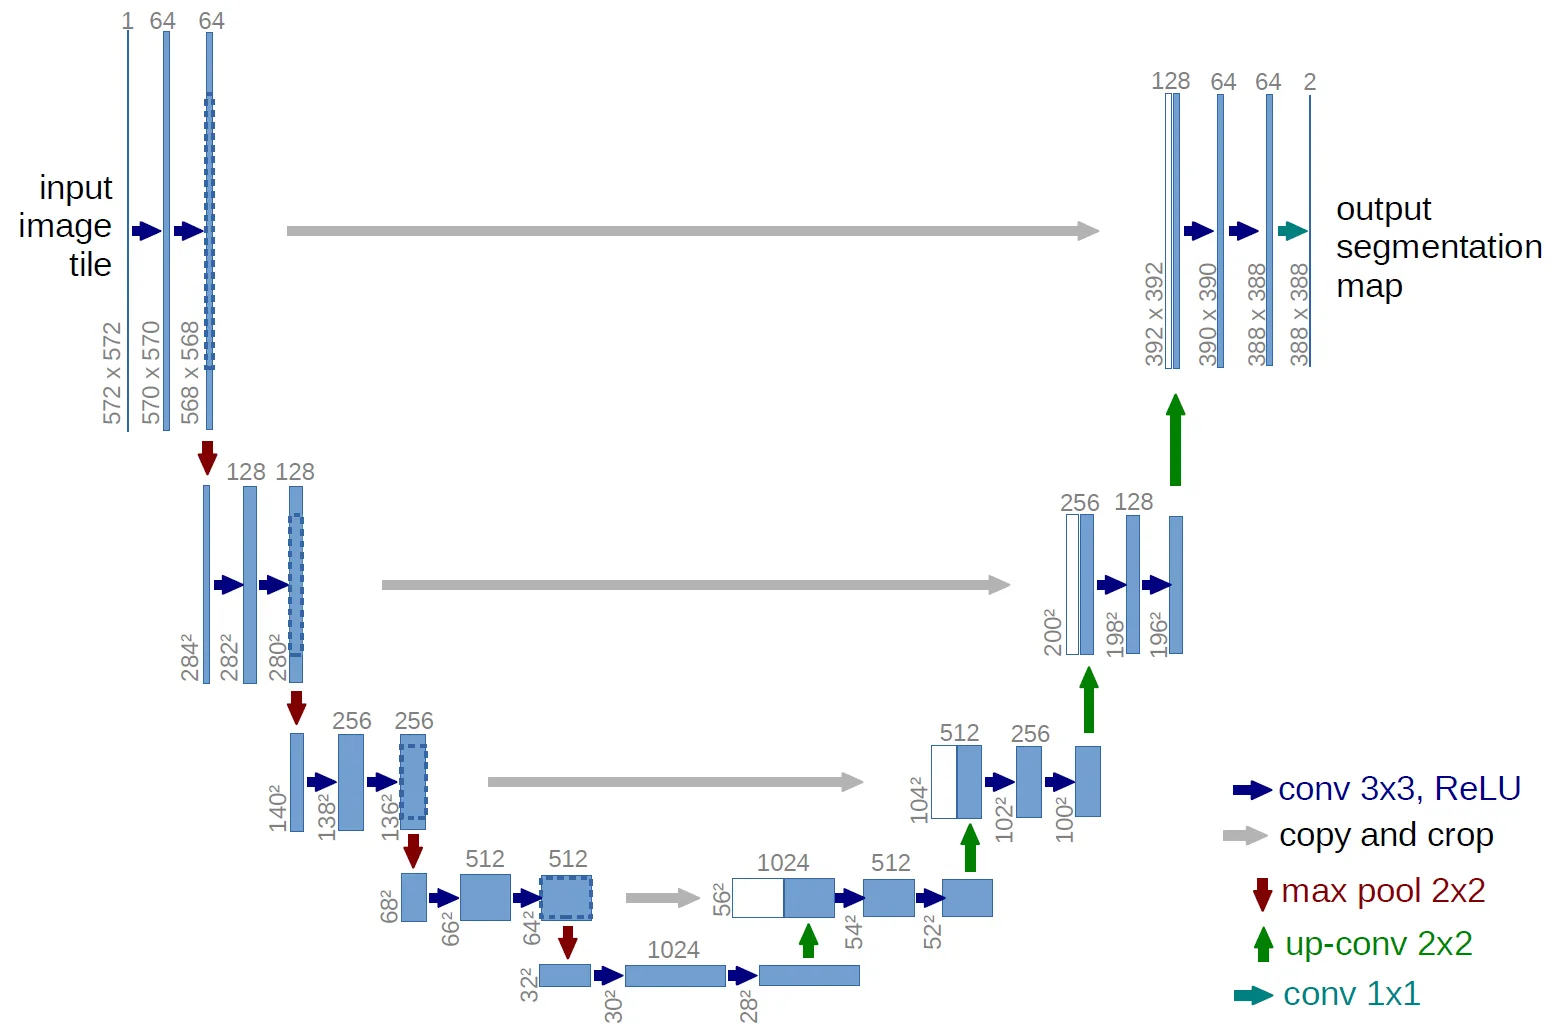


- 青ボックス：画像、特徴マップ
- 白ボックス：コピーされた特徴マップ
- ボックスの上の数字：チャンネル数
- ボックスの左下の数字：縦横のサイズ	青矢印：kernel size 3×3, padding0の畳み込み、ReLU
- グレー矢印：特徴マップのコピーをクロップ
- 赤矢印：kernel size 2×2のmax-pooling
- 緑矢印：kernel size 2×2、stride2の逆畳み込み
- 青緑矢印：kernel size 1×1の畳み込み

In [ ]:
# 分類分けされる数
OUTPUT_CHANNELS = 3

**MobileNetV2とは（転移学習）**  

U-Net はエンコーダ (downsampler) とデコーダ (upsampler) から成ります。  
特徴を学習して訓練可能パラメータを減じるために、事前訓練されたMobileNetV2がエンコーダとして使用されている。　　

デコーダは Pix2pix チュートリアル でTensorFlowサンプルで既に実装されたumsampleブロックです。

参考資料  
https://deepsquare.jp/2020/06/mobilenet-v2/

In [ ]:
# Kerasアプリケーションアーキテクチャの設定
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)
                                  #----------------
                                  #encorder部分には学習済みのMovileNet２を使用

# ①ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー
# Use the activations of these layers(アクティベーションレイヤーの設定)
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',       # 4x4
]

# layer_namesの項目をリスト化
layers = [base_model.get_layer(name).output for name in layer_names]

# ②ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー
# Create the feature extraction model(特徴量を抽出するモデルを作成する)
down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

# MobileNetV2の重みは固定
down_stack.trainable = False

# ③ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー
# decorder部分にはpix2pixを用いる
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

# ④ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー
def unet_model(output_channels):

  # This is the last layer of the model(これはモデルの最後のレイヤーです)
  last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2,
      padding='same')  #64x64 -> 128x128

  # layers内のKerasテンソルを形状をshape指定してインスタンス化
  inputs = tf.keras.layers.Input(shape=[128, 128, 3])
  x = inputs

  # Use the activations of these layers(モデルのダウンサンプリング)
  skips = down_stack(x)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Create the feature extraction model(スキップ接続のアップサンプリングと確立)
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  x = last(x)
  # トレーニング機能と推論機能を備えたオブジェクトにレイヤーをグループ化します。
  return tf.keras.Model(inputs=inputs, outputs=x)

### モデルをトレーニングする

In [ ]:
# 学習する
model = unet_model(OUTPUT_CHANNELS)
model.compile(optimizer='adam',
              # 損失関数(losses.SparseCategoricalCrossentropy(from_logits=True))を設定
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# 結果のアーキテクチャをプロット
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

In [ ]:
def show_predictions(dataset=None, num=1):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

In [ ]:
show_predictions()

In [ ]:
# コールバック関数の定義
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [ ]:
# サンプルの予測
EPOCHS = 10
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()])

In [ ]:
# 学習結果の描写
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [ ]:
# 予測の実行
show_predictions(test_dataset, 10)